## Particle Falling in a Viscous Medium

### Objective
To simulate the motion of a particle falling vertically under gravity in a viscous medium where the drag force is proportional to velocity ($F_{drag} = -bv$). We will use **Euler's Method** to compute the position and velocity over time and compare the results with the analytical (exact) solution.

**Parameters:**
* **Gravity:** $g = 10 \, \text{m/s}^2$
* **Drag Coefficient:** $b/m = 2.0 \, \text{s}^{-1}$
* **Initial Conditions:** $x(0) = 10 \, \text{m}$ (Height), $v(0) = 0 \, \text{m/s}$
* **Time Interval:** $0 \le t \le 3.0 \, \text{s}$

**Cases to Study:**
1.  **Case A:** Numerical simulation with $n=50$ steps.
2.  **Case B:** Numerical simulation with $n=500$ steps (Higher precision).
3.  **Case C:** Free fall without air resistance ($b=0$) with $n=500$.

### Mathematical Formulation

**1. Equation of Motion**
We define the upward direction as positive ($+$) and downward as negative ($-$).
* **Gravity:** Acts downwards, so $F_g = -mg$.
* **Drag Force:** Opposes velocity, so $F_{drag} = -bv$.
* **Net Force:** $F_{net} = -mg - bv$.

Using Newton's Second Law ($F=ma$), the acceleration is:
$$a(t) = \frac{F_{net}}{m} = -g - \frac{b}{m}v(t)$$
Given constants: $g = 10 \, \text{m/s}^2$ and $b/m = 2.0 \, \text{s}^{-1}$.



### Mathematical Formulation

**1. Equation of Motion**
A particle falling in a viscous medium experiences two forces:
* **Gravity ($F_g$):** Acting downwards (negative direction), $F_g = -mg$.
* **Drag Force ($F_d$):** Acting opposing motion. Since velocity $v$ is downwards (negative), the drag force $-bv$ acts upwards (positive).
    $$F_{net} = -mg - bv$$

According to Newton's Second Law ($F=ma$):
$$m \frac{dv}{dt} = -mg - bv \implies \frac{dv}{dt} = -g - \frac{b}{m}v$$
Let $k = \frac{b}{m} = 2.0 \, s^{-1}$. The differential equation is:
$$\frac{dv}{dt} = -(g + kv)$$

---

**2. Derivation of Analytical Solutions**
To find the exact solution, we solve the differential equation using calculus.

**A. Velocity $v(t)$:**
Using separation of variables:
$$\frac{dv}{g+kv} = -dt$$
Integrate both sides from initial state $(0, 0)$ to $(t, v)$:
$$\int_{0}^{v} \frac{dv}{g+kv} = -\int_{0}^{t} dt$$
$$\frac{1}{k} \ln\left(\frac{g+kv}{g}\right) = -t$$
Exponentiating both sides:
$$g+kv = g e^{-kt} \implies v(t) = -\frac{g}{k} (1 - e^{-kt})$$

**B. Position $x(t)$:**
Since $v(t) = \frac{dx}{dt}$, position is the integral of velocity:
$$x(t) = x_0 + \int_{0}^{t} v(t') dt'$$
Substitute $v(t)$:
$$x(t) = x_0 - \frac{g}{k} \int_{0}^{t} (1 - e^{-kt'}) dt'$$
$$x(t) = x_0 - \frac{g}{k} \left[ t - \frac{e^{-kt'}}{-k} \right]_0^t$$
Applying limits:
$$x(t) = x_0 - \frac{g}{k}t + \frac{g}{k^2}(1 - e^{-kt})$$

---

**3. Numerical Approach (Euler's Method)**
For the computational simulation, we approximate the derivatives using small time steps $\Delta t$:
* $v_{i+1} = v_i + a_i \Delta t$
* $x_{i+1} = x_i + v_i \Delta t$
Where acceleration $a_i = -g - k v_i$.


**4. Special Case: Vacuum ($b=0$)**
When there is no air resistance ($b=0$), the equations simplify to standard free-fall:
* $v(t) = -gt$
* $x(t) = x_0 - \frac{1}{2}gt^2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
g = 10.0
b_m = 2.0
y0 = 10.0
v0 = 0.0
t_max = 3.0

In [11]:
def exact_velocity_viscous(t):
    return -(g/b_m) * (1 - np.exp(-b_m*t))

def exact_position_viscous(t):
    temp1 = (g/b_m)*t
    temp2 = (g/b_m**2)*(1-np.exp(-b_m*t))
    return y0 - temp1 + temp2

In [12]:
def exact_velocity_vaccum(t):
    return -g*t

def exact_position_vaccum(t):
    return y0 - 0.5 * g * t**2

In [13]:
def euler_method(n_steps,drag_coeff):

    dt = t_max/n_steps
    t_values = np.linspace(0,t_max,n_steps+1)

    y_values = np.zeros(n_steps+1)
    v_values = np.zeros(n_steps+1)

    y_values[0] = y0
    v_values[0] = v0

    for i in range(n_steps):
        v_current = v_values[i]

        accel = -g -(drag_coeff * v_current)

        v_values[i+1] = v_current + accel*dt
        y_values[i+1] = y_values[i] + v_current*dt

    return t_values,y_values,v_values    

In [14]:
t_50, y_50, v_50 = euler_method(50, b_m)
t_500, y_500, v_500 = euler_method(500, b_m)
t_vac, y_vac, v_vac = euler_method(500, 0.0)

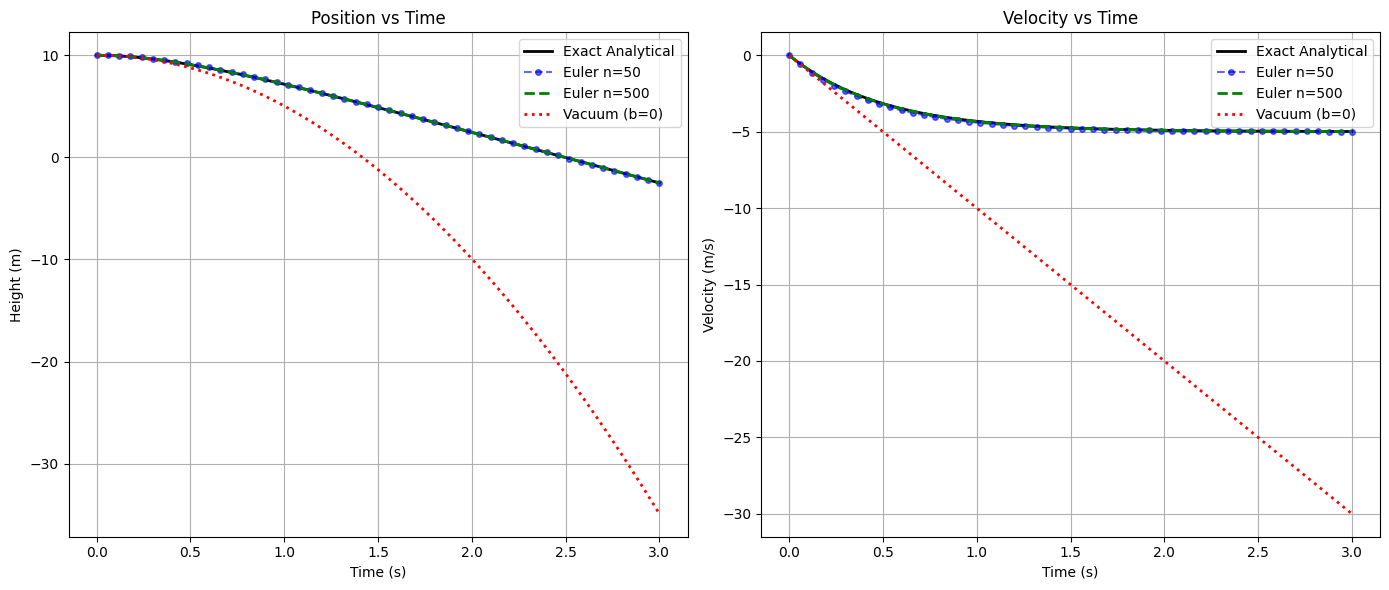

In [15]:
t_exact = np.linspace(0, t_max, 200)
y_exact_viscous = exact_position_viscous(t_exact)
v_exact_viscous = exact_velocity_viscous(t_exact)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(t_exact, y_exact_viscous, 'k-', linewidth=2, label='Exact Analytical')
plt.plot(t_50, y_50, 'bo--', markersize=4, alpha=0.6, label='Euler n=50')
plt.plot(t_500, y_500, 'g--', linewidth=2, label='Euler n=500')
plt.plot(t_vac, y_vac, 'r:', linewidth=2, label='Vacuum (b=0)')
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t_exact, v_exact_viscous, 'k-', linewidth=2, label='Exact Analytical')
plt.plot(t_50, v_50, 'bo--', markersize=4, alpha=0.6, label='Euler n=50')
plt.plot(t_500, v_500, 'g--', linewidth=2, label='Euler n=500')
plt.plot(t_vac, v_vac, 'r:', linewidth=2, label='Vacuum (b=0)')
plt.title('Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### 4. Observations and Conclusion

**Observations from the Graph:**
1.  **Terminal Velocity:**
    * The **Velocity vs Time** graph shows the particle deaccelerating initially but then flattening out.
    * By approx 2.0 sec, the velocity becomes constant at **$-5.0$ m/s**. This is the terminal velocity where drag ($F_d$) cancels out gravity ($F_g$).
    * In contrast, the **Vacuum case (Red dotted line)** shows velocity decreasing linearly without limit ($v = -gt$), reaching $-30$ m/s at the end.

2.  **Comparison of n=50 vs n=500:**
    * Visually, the blue dots ($n=50$) and green dashed line ($n=500$) overlap almost perfectly with the exact analytical solution (black line).
    * The step size for $n=50$ ($dt=0.06s$) is sufficiently small to capture the dynamics of this specific problem. Furthermore, once the particle nears terminal velocity, the acceleration drops to zero. Euler's method is exact for constant-velocity motion, so the error stops accumulating during the second half of the fall.

**Conclusion:**
* This experiment highlights the significant impact of drag. Without it, the particle would have fallen nearly 45 meters (Vacuum). With drag, it only fell roughly 12 meters.
* Euler's method proved to be a reliable way to solve the differential equation. While $n=500$ is theoretically more precise, $n=50$ yielded sufficient accuracy for this simulation because the system rapidly stabilizes into constant motion.
* The perfect overlap between the numerical simulation (Euler) and the calculus-derived formula (Analytical) confirms the validity of our code.